In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly. graph_objs as go
import plotly.express as px
import seaborn as sns
import datetime
%matplotlib inline
pd.set_option('display.max_columns', None)  
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv


In [4]:
df = pd.read_csv('/kaggle/input/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv', encoding= 'unicode_escape')

I have completed importing Libraries and the data set from kaggle

In [5]:
print('preview of data')
df.head(10)

preview of data


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [7]:
df.shape

(16719, 16)

Now that I  comfirmed the data types and the types of data I want, I will now start cleaning up the data sets from duplicates and drop all the cells that have no value or N/A value 

In [8]:
display(df.drop_duplicates())

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [10]:
df = df[df["Year_of_Release"].notnull()]
df = df[df["Genre"].notnull()]
df = df[df["Publisher"].notnull()]
df['Year_of_Release']=df['Year_of_Release'].astype('int64')
df['User_Score']=df['User_Score'].replace('tbd',0).astype('float64')

we will now see the average sales of different Genre Games in different regions 
starting with 

North America 

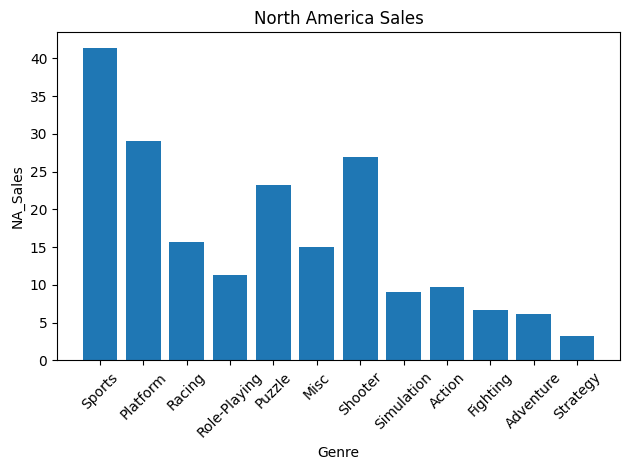

In [11]:
plt.bar(df['Genre'], df['NA_Sales'])
df_sorted = df.sort_values(by='NA_Sales', ascending=False)
# Add labels and title
plt.xlabel('Genre')
plt.ylabel('NA_Sales')
plt.title('North America Sales')

plt.xticks(rotation=45)  # Rotate the x-axis labels to prevent overlapping
plt.tight_layout()  # Adjust the layout to fit the figure size
# Show the plot
plt.show()

From this Graph above, I can conclude that Customers in north america are more likely to purchase games that have sports, platform and shooter genres. they are less likely to buy games that have strategy, adventure and fighting genres. 

now we will look into Europe

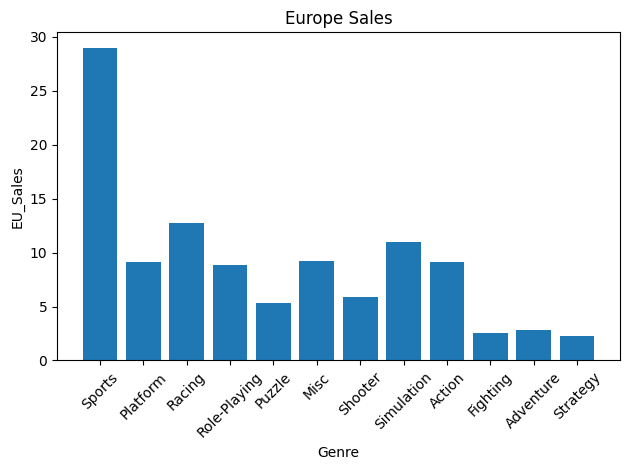

In [12]:
plt.bar(df['Genre'], df['EU_Sales'])
df_sorted = df.sort_values(by='EU_Sales', ascending=False)
# Add labels and title
plt.xlabel('Genre')
plt.ylabel('EU_Sales')
plt.title('Europe Sales')

plt.xticks(rotation=45)  # Rotate the x-axis labels to prevent overlapping
plt.tight_layout()  # Adjust the layout to fit the figure size
# Show the plot
plt.show()

From this Data, I can conclude tha tcustomers are highly likely to purchase games that have sports genre than the other genres. the top three genres that highly bought are Sports, Racing, and simulation. the bottom three that are not highly sought after are Fighting, Adventure and Strategy. 

Now I will look into Japan Sales

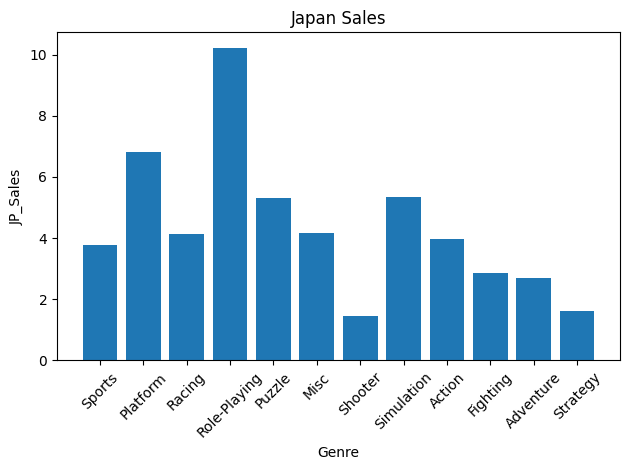

In [13]:
plt.bar(df['Genre'], df['JP_Sales'])
df_sorted = df.sort_values(by='JP_Sales', ascending=False)
# Add labels and title
plt.xlabel('Genre')
plt.ylabel('JP_Sales')
plt.title('Japan Sales')

plt.xticks(rotation=45)  # Rotate the x-axis labels to prevent overlapping
plt.tight_layout()  # Adjust the layout to fit the figure size
# Show the plot
plt.show()

From this analysis, I can conclude that customers in Japan are more likly to buy games that promote Role-Playing, Platform, and Simulation. While genres like Shooter, Adventure, and Strategy are less sought after.

Now I will start Analysis for Other Countries

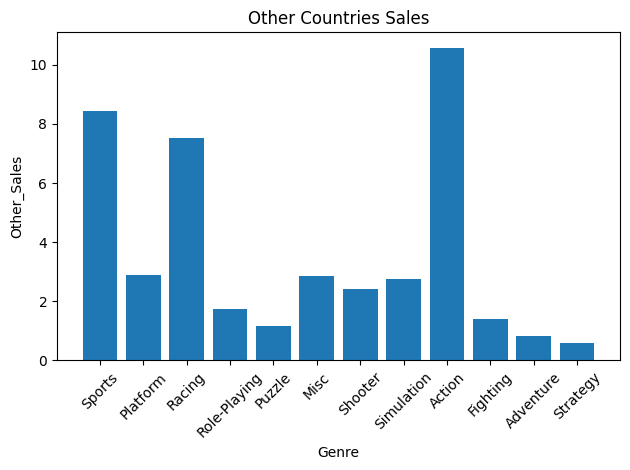

In [14]:
plt.bar(df['Genre'], df['Other_Sales'])
df_sorted = df.sort_values(by='Other_Sales', ascending=False)
# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Other_Sales')
plt.title('Other Countries Sales')

plt.xticks(rotation=45)  # Rotate the x-axis labels to prevent overlapping
plt.tight_layout()  # Adjust the layout to fit the figure size
# Show the plot
plt.show()

From the analysis above, we can see that in other countries other than North America, Europe and Japan, the customers were more likely to buy games that promote Action, Sports, and Racing. they are also less likely to purchases games that promote Puzzle, Adventure, and Strategy 

Now I am going to conduct analysis to check which years had the most sales globally and trends. 

Text(0.5, 0, 'Year of Release')

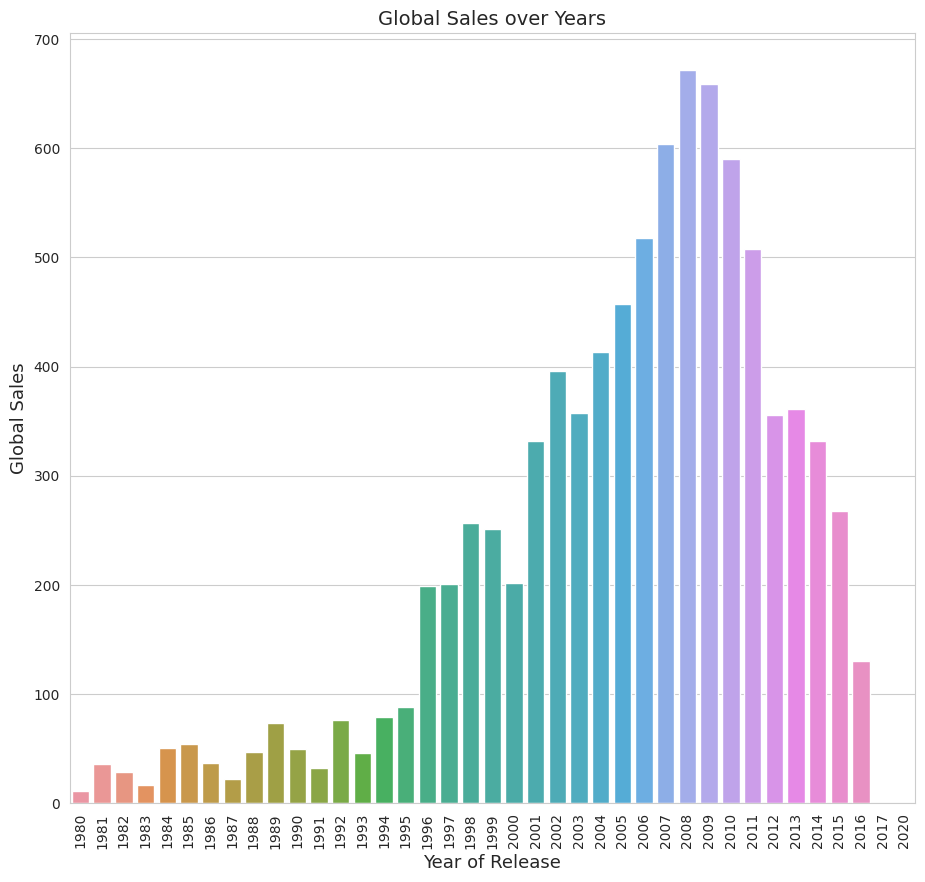

In [15]:
fig=plt.figure(figsize=(24,10))
plt.subplots_adjust(left=None, wspace=None, hspace=None)
sns.set_style("whitegrid")

plt.subplot(1, 2, 1)
plt.title('Global Sales over Years',fontdict={'fontsize':14})
plt.xticks(rotation=90)
sns.barplot(x='Year_of_Release',y='Global_Sales',data=df.groupby(df['Year_of_Release'].sort_values()).sum().Global_Sales.reset_index())
plt.ylabel('Global Sales',fontdict={'fontsize':13})
plt.xlabel('Year of Release',fontdict={'fontsize':13})

we do see an spike in sales from 2001 to 2014 but has reduced later on, the highest number of sales was in 2008. Now I will make a graph to show the correlation and pauseable explaination for this spike. 

Now I will make a bar graph to show the number of games that have released that year

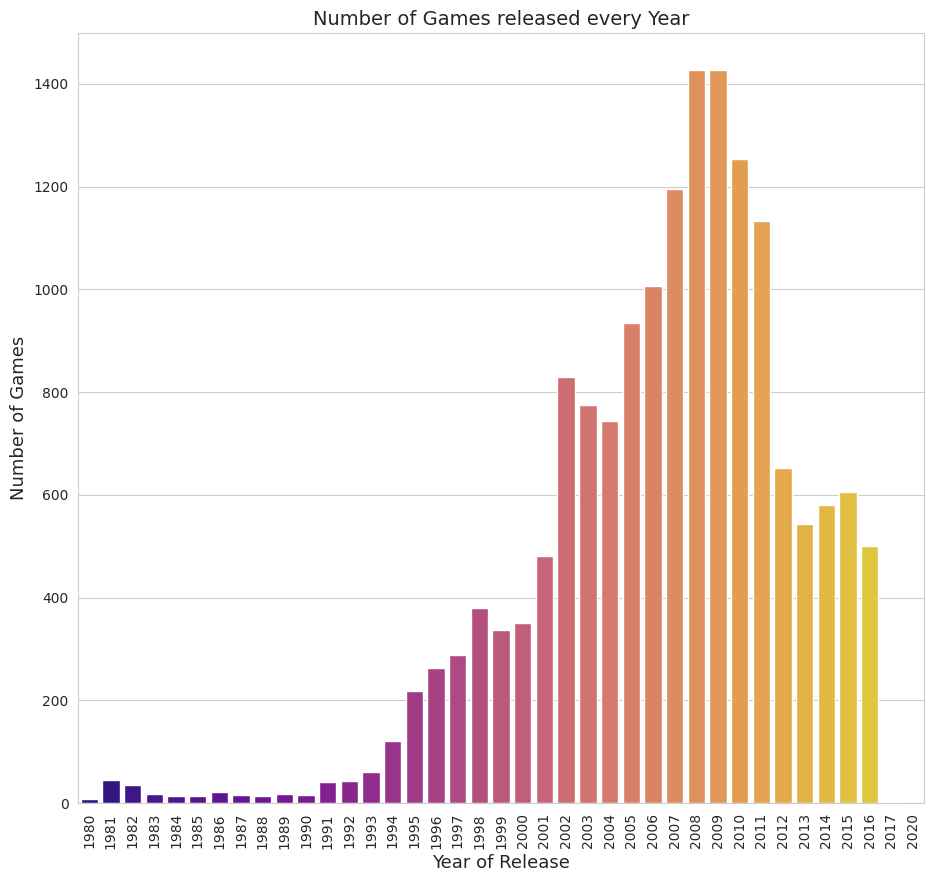

In [17]:
fig=plt.figure(figsize=(24,10))
plt.subplots_adjust(left=None, wspace=None, hspace=None)
sns.set_style("whitegrid")
plt.subplot(1, 2, 2)
plt.title('Number of Games released every Year',fontdict={'fontsize':14})
plt.xticks(rotation=90)
sns.barplot(x=df.Year_of_Release.value_counts().index, y=df.Year_of_Release.value_counts(),palette='plasma');
plt.ylabel('Number of Games',fontdict={'fontsize':13})
plt.xlabel('Year of Release',fontdict={'fontsize':13});

Now I will compare these two graphs to show an relation between them 

In [18]:
sc = StandardScaler()
Year_Count_Sales=df.groupby(df['Year_of_Release']).apply(lambda x: pd.Series({
    'Count'       : x['Name'].count(),
    'Global_Sales'       : x['Global_Sales'].sum()})).reset_index()

Year_Count_Sales_Scaled = pd.concat([Year_Count_Sales['Year_of_Release'],pd.DataFrame(sc.fit_transform(Year_Count_Sales[['Count','Global_Sales']]),columns=['Count', 'Global_Sales'])],axis=1)

fig = go.Figure(data=[
    go.Scatter(
                x=Year_Count_Sales_Scaled['Year_of_Release'], 
                y=Year_Count_Sales_Scaled['Count'],
                mode='lines+markers',
                name='Number of Games Released',
                marker = dict(size=8),
                line=dict(color = '#FA8072',width=2.5),
                text=Year_Count_Sales['Count'],
                
                hovertemplate = '<i>Year</i>: %{x}'
                                '<br><i>Number of Games</i>: %{text}<br>'),
    go.Scatter(
                x=Year_Count_Sales_Scaled['Year_of_Release'], 
                y=Year_Count_Sales_Scaled['Global_Sales'],
                mode='lines+markers',
                name='Global Sales',
                marker = dict(size=8),
                line=dict(color = '#6495ED',width=2.5),
                text = Year_Count_Sales['Global_Sales'],
                hovertemplate = '<i>Year</i>: %{x}'
                                '<br><i>Global_Sales</i>: %{text}<br>')

],layout=dict(legend=dict(x=0.73, y=1.15, font=dict(size=10)),legend_orientation="v",title="Relationship between Number of Releases and Global Sales",
            xaxis=dict(tickmode = 'linear',tickangle=-90,tickfont=dict(size=10),title="Year of Release",tickwidth=5,ticklen=8,zeroline=True,gridcolor="white",
             showline=True),
            yaxis=dict(title="Number of Release / Global Sales",zeroline=True,showline=True,gridcolor="#DCDCDC",
                         showgrid=True,
        zerolinecolor='#DCDCDC',
        zerolinewidth=1)
            ,plot_bgcolor='white'))

fig.show()

From the analsis from above, we can see that when there more releases of games into the market, the more sales have been driven. This could also the be the reason when there was lack new games, there was less sales. 

That would be the end of this analysis, there could be alot more possible analysis that can be done. But I found the analysis that I wished to find.

Thank you for spending time reviewing my code, you can use the code if you wish to and feel free to comment on my work.